# Trabajo práctico integrador 
## _Análisis de datos_
## CEIA Co12

### Grupo 2:
1. Córdoba, Pablo
2. Ferrán, Natanael
3. Pérez Millán, Rodrigo

### Dataset:
- [Global Data on Sustainable Energy (2000-2020)](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

### Posibles cuestiones a resolver:
- Clusterizar los países, según su nivel de emisiones de CO2.
- Clusterizar los países, según su dedicación para con la emigración hacia las energías renovables.
- Encontrar oportunidades de inversión, a partir del análisis de capacidad instalada vs demanda vs emisiones de CO2 (si contaminan mucho, hay demanda creciente y poca capacidad instalada, habría una buena oportunidad de inversión)

***

In [11]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
# reading the file

url= 'https://raw.githubusercontent.com/nferran/tp_final_analisis_de_datos/main/global-data-on-sustainable-energy.csv'
df= pd.read_csv(url)

### Análisis exploratorio inicial

In [19]:
# showing first 5 rows

df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [29]:
# showing a summary of 5 relevant numeric features

five_numeric_columns = ['Renewable-electricity-generating-capacity-per-capita','Electricity from renewables (TWh)',r'Renewables (% equivalent primary energy)','Value_co2_emissions_kt_by_country','Primary energy consumption per capita (kWh/person)']
df[five_numeric_columns].describe()

,Renewable-electricity-generating-capacity-per-capita,Electricity from renewables (TWh),Renewables (% equivalent primary energy),Value_co2_emissions_kt_by_country,Primary energy consumption per capita (kWh/person)
count,2718.000000,3628.000000,1512.000000,3.221000e+03,3649.000000
mean,113.137498,23.968010,11.986707,1.598665e+05,25743.981745
std,244.167256,104.431085,14.994644,7.736611e+05,34773.221366
min,0.000000,0.000000,0.000000,1.000000e+01,0.000000
25%,3.540000,0.040000,2.137095,2.020000e+03,3116.737300
50%,32.910000,1.470000,6.290766,1.050000e+04,13120.570000
75%,112.210000,9.600000,16.841638,6.058000e+04,33892.780000
max,3060.190000,2184.940000,86.836586,1.070722e+07,262585.700000


In [30]:
# showing features' types

df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [41]:
# updating incorrect data type

df.loc[:,r'Density\n(P/Km2)'] = df.loc[:,r'Density\n(P/Km2)'].str.replace(',','.').astype(float)

In [43]:
# checking features' types

df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [ ]:
plt.figure(figsize=(30,5))

sns.histplot(data= df2, x= 'Entity', y= 'Value_co2_emissions_kt_by_country')

plt.show()

In [87]:
df2= df.Value_co2_emissions_kt_by_country.groupby(df.Entity).mean().to_frame().reset_index().sort()
df2.head()

AttributeError: 'DataFrame' object has no attribute 'sort'

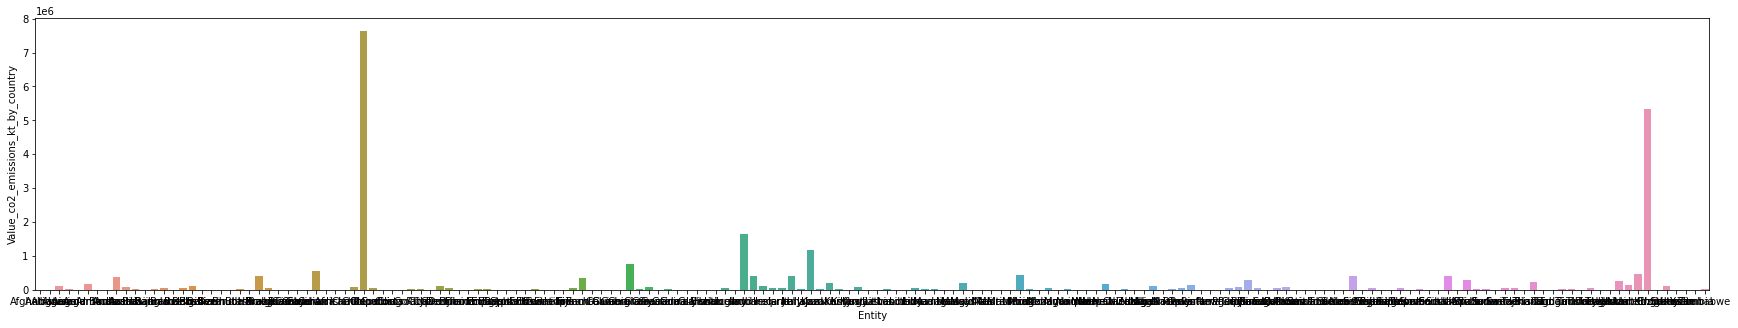

In [86]:
plt.figure(figsize=(30,5))

sns.barplot(data= df2, x= 'Entity', y= 'Value_co2_emissions_kt_by_country')

plt.show()